In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import pandas as pd
salaries_df=pd.read_csv('/content/gdrive/MyDrive/DM_Assignment2/salaries.csv')
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M


In [5]:
# 1. Check for missing values
missing_values = salaries_df.isnull().sum()

# 2. Check for duplicate rows
duplicate_rows = salaries_df.duplicated().sum()

# 3. Check data types
data_types = salaries_df.dtypes

missing_values, duplicate_rows, data_types


(work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                0
 salary_currency       0
 salary_in_usd         0
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64,
 3281,
 work_year              int64
 experience_level      object
 employment_type       object
 job_title             object
 salary                 int64
 salary_currency       object
 salary_in_usd          int64
 employee_residence    object
 remote_ratio           int64
 company_location      object
 company_size          object
 dtype: object)

In [6]:
# Remove duplicate rows
salaries_df = salaries_df.drop_duplicates()

# Check the shape of the dataframe after removing duplicates
salaries_df.shape


(4693, 11)

In [7]:
# Compute summary statistics for numerical columns
summary_statistics = salaries_df[['work_year', 'salary', 'salary_in_usd', 'remote_ratio']].describe()

summary_statistics


,work_year,salary,salary_in_usd,remote_ratio
count,4693.000000,4.693000e+03,4693.000000,4693.000000
mean,2022.623269,1.914203e+05,144800.540805,45.962071
std,0.650257,6.177731e+05,67609.355903,48.684706
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2022.000000,1.000000e+05,96000.000000,0.000000
50%,2023.000000,1.413000e+05,139810.000000,0.000000
75%,2023.000000,1.900000e+05,185400.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [8]:
!pip install "ipython>=7"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00


In [9]:
from IPython.core.display import display, HTML

# D3.js histogram for the salary_in_usd column

d3_histogram_code = """
<div id="d3-container"></div>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = """ + str(salaries_df['salary_in_usd'].tolist()) + """;

var svgWidth = 600, svgHeight = 400;
var margin = { top: 20, right: 20, bottom: 60, left: 50 };
var width = svgWidth - margin.left - margin.right;
var height = svgHeight - margin.top - margin.bottom;

var svg = d3.select("#d3-container")
            .append("svg")
            .attr("width", svgWidth)
            .attr("height", svgHeight)
            .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

var x = d3.scaleLinear()
          .domain([0, d3.max(data)])
          .range([0, width]);

var histogram = d3.histogram()
                 .domain(x.domain())
                 .thresholds(x.ticks(50))
                 (data);

var y = d3.scaleLinear()
          .range([height, 0])
          .domain([0, d3.max(histogram, function(d) { return d.length; })]);

var bar = svg.selectAll(".bar")
              .data(histogram)
              .enter()
              .append("g")
              .attr("class", "bar")
              .attr("transform", function(d) { return "translate(" + x(d.x0) + "," + y(d.length) + ")"; });

bar.append("rect")
   .attr("x", 1)
   .attr("width", x(histogram[0].x1) - x(histogram[0].x0) - 1)
   .attr("height", function(d) { return height - y(d.length); });

svg.append("g")
   .attr("class", "x-axis")
   .attr("transform", "translate(0," + height + ")")
   .call(d3.axisBottom(x));

svg.append("g")
   .attr("class", "y-axis")
   .call(d3.axisLeft(y));

</script>
"""

display(HTML(d3_histogram_code))


In [49]:
# D3.js bar chart for the job_title column

job_title_counts = salaries_df['job_title'].value_counts().to_dict().items()
job_title = [list(item) for item in job_title_counts]
d3_bar_chart_code = """
<div id="d3-bar-container"></div>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = """ + str(job_title) + """;

var svgWidth = 800, svgHeight = 600;
var margin = { top: 20, right: 20, bottom: 100, left: 100 };
var width = svgWidth - margin.left - margin.right;
var height = svgHeight - margin.top - margin.bottom;

var svg = d3.select("#d3-bar-container")
            .append("svg")
            .attr("width", svgWidth)
            .attr("height", svgHeight)
            .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

var x = d3.scaleBand()
          .rangeRound([0, width])
          .padding(0.1)
          .domain(data.map(function(d) { return d[0]; }));

var y = d3.scaleLinear()
          .rangeRound([height, 0])
          .domain([0, d3.max(data, function(d) { return d[1]; })]);

svg.append("g")
   .attr("class", "x-axis")
   .attr("transform", "translate(0," + height + ")")
   .call(d3.axisBottom(x))
   .selectAll("text")
   .attr("y", 0)
   .attr("x", -10)
   .attr("dy", ".35em")
   .attr("transform", "rotate(-45)")
   .style("text-anchor", "end");

svg.append("g")
   .attr("class", "y-axis")
   .call(d3.axisLeft(y));

svg.selectAll(".bar")
   .data(data)
   .enter().append("rect")
   .attr("class", "bar")
   .attr("x", function(d) { return x(d[0]); })
   .attr("y", function(d) { return y(d[1]); })
   .attr("width", x.bandwidth())
   .attr("height", function(d) { return height - y(d[1]); });

</script>
"""

display(HTML(d3_bar_chart_code))


In [40]:
# D3.js pie chart for the experience_level column

experience_level_counts = salaries_df['experience_level'].value_counts().to_dict().items()
converted_list = [list(item) for item in experience_level_counts]

d3_pie_chart_code = """
<div id="d3-pie-container"></div>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = """ + str(converted_list) + """;

var width = 450,
    height = 450,
    radius = Math.min(width, height) / 2;

var color = d3.scaleOrdinal(d3.schemeCategory10);

var svg = d3.select("#d3-pie-container")
            .append("svg")
            .attr("width", width)
            .attr("height", height)
            .append("g")
            .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")");

var pie = d3.pie().value(function(d) { return d[1]; });
var path = d3.arc().outerRadius(radius).innerRadius(0);
var label = d3.arc().outerRadius(radius - 40).innerRadius(radius - 40);

var arc = svg.selectAll(".arc")
              .data(pie(data))
              .enter().append("g")
              .attr("class", "arc");

arc.append("path")
   .attr("d", path)
   .attr("fill", function(d) { return color(d.data[0]); });

arc.append("text")
   .attr("transform", function(d) { return "translate(" + label.centroid(d) + ")"; })
   .attr("dy", "0.35em")
   .text(function(d) { return d.data[0]; });

</script>
"""

display(HTML(d3_pie_chart_code))


In [41]:
# D3.js scatter plot for salary_in_usd vs. remote_ratio

scatter_data = salaries_df[['salary_in_usd', 'remote_ratio']].values.tolist()
print(scatter_data)
d3_scatter_plot_code = """
<div id="d3-scatter-container"></div>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = """ + str(scatter_data) + """;

var svgWidth = 800, svgHeight = 600;
var margin = { top: 20, right: 20, bottom: 60, left: 50 };
var width = svgWidth - margin.left - margin.right;
var height = svgHeight - margin.top - margin.bottom;

var svg = d3.select("#d3-scatter-container")
            .append("svg")
            .attr("width", svgWidth)
            .attr("height", svgHeight)
            .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

var x = d3.scaleLinear()
          .range([0, width])
          .domain([0, d3.max(data, function(d) { return d[1]; })]);

var y = d3.scaleLinear()
          .range([height, 0])
          .domain([0, d3.max(data, function(d) { return d[0]; })]);

svg.append("g")
   .attr("class", "x-axis")
   .attr("transform", "translate(0," + height + ")")
   .call(d3.axisBottom(x))
   .append("text")
   .attr("x", width / 2)
   .attr("y", 40)
   .attr("fill", "#000")
   .text("Remote Ratio");

svg.append("g")
   .attr("class", "y-axis")
   .call(d3.axisLeft(y))
   .append("text")
   .attr("transform", "rotate(-90)")
   .attr("y", -40)
   .attr("x", -height / 2)
   .attr("fill", "#000")
   .text("Salary in USD");

svg.selectAll("dot")
   .data(data)
   .enter().append("circle")
   .attr("r", 3)
   .attr("cx", function(d) { return x(d[1]); })
   .attr("cy", function(d) { return y(d[0]); })
   .style("fill", "#69b3a2");

</script>
"""

display(HTML(d3_scatter_plot_code))


[[202800, 0], [104300, 0], [73824, 0], [67672, 0], [290000, 0], [173200, 0], [235000, 100], [204000, 100], [300000, 0], [222000, 0], [160000, 0], [136000, 0], [206000, 0], [134000, 0], [155000, 0], [105000, 0], [287500, 0], [212500, 0], [190027, 0], [152022, 0], [19434, 100], [130000, 100], [100000, 100], [250000, 0], [125000, 0], [131000, 0], [88000, 0], [80000, 0], [50000, 0], [198000, 100], [132000, 100], [125000, 100], [115000, 100], [184000, 0], [123000, 0], [145000, 0], [130000, 0], [170700, 0], [113900, 0], [280000, 0], [200000, 0], [185000, 0], [81000, 0], [220000, 0], [80000, 0], [185000, 0], [123000, 0], [80000, 0], [75000, 0], [150000, 0], [130000, 0], [53000, 100], [48000, 100], [369120, 0], [73824, 0], [150000, 0], [125000, 0], [150000, 100], [130000, 100], [70748, 0], [67056, 0], [190000, 0], [170000, 0], [125000, 100], [115000, 100], [130000, 100], [101570, 100], [150000, 100], [115000, 100], [194000, 0], [175000, 0], [185000, 0], [160000, 0], [185000, 0], [50000, 0], [7

In [42]:
# Prepare data for the grouped bar chart

# Filter the top job titles for visualization
top_job_titles = salaries_df['job_title'].value_counts().head(5).index.tolist()

# Filter the dataset for these top job titles
filtered_df = salaries_df[salaries_df['job_title'].isin(top_job_titles)]

# Calculate average salary by job_title and experience_level
grouped_data = filtered_df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()

grouped_data_list = []

for job in top_job_titles:
    job_data = grouped_data[grouped_data['job_title'] == job]
    job_data_dict = {'job_title': job}
    for index, row in job_data.iterrows():
        job_data_dict[row['experience_level']] = row['salary_in_usd']
    grouped_data_list.append(job_data_dict)

# Convert the data into a format suitable for D3 grouped bar chart
grouped_bar_data = {
    'columns': ['job_title'] + grouped_data['experience_level'].unique().tolist(),
    'data': grouped_data_list
}

grouped_bar_data


{'columns': ['job_title', 'EN', 'EX', 'MI', 'SE'],
 'data': [{'job_title': 'Data Engineer',
   'EN': 81771.97959183673,
   'EX': 191415.265625,
   'MI': 111023.5,
   'SE': 154595.73961661343},
  {'job_title': 'Data Scientist',
   'EN': 80917.4,
   'EX': 188429.57894736843,
   'MI': 104942.77251184834,
   'SE': 170376.17558528428},
  {'job_title': 'Data Analyst',
   'EN': 67183.18666666666,
   'EX': 107000.0,
   'MI': 96994.82352941176,
   'SE': 122892.6330749354},
  {'job_title': 'Machine Learning Engineer',
   'EN': 98389.35,
   'EX': 190950.0,
   'MI': 134953.1686746988,
   'SE': 189129.60778443114},
  {'job_title': 'Analytics Engineer',
   'EN': 115930.0,
   'EX': 177100.0,
   'MI': 137143.34615384616,
   'SE': 158550.2394366197}]}

In [43]:
# D3.js grouped bar chart

d3_grouped_bar_chart_code = """
<div id="d3-grouped-bar-container"></div>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = """ + str(grouped_bar_data) + """;

var svgWidth = 800, svgHeight = 600;
var margin = { top: 20, right: 20, bottom: 100, left: 80 };
var width = svgWidth - margin.left - margin.right;
var height = svgHeight - margin.top - margin.bottom;

var svg = d3.select("#d3-grouped-bar-container")
            .append("svg")
            .attr("width", svgWidth)
            .attr("height", svgHeight)
            .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

var x0 = d3.scaleBand()
           .rangeRound([0, width])
           .paddingInner(0.1);

var x1 = d3.scaleBand()
           .padding(0.05);

var y = d3.scaleLinear()
          .rangeRound([height, 0]);

var z = d3.scaleOrdinal()
          .range(["#98abc5", "#8a89a6", "#7b6888", "#6b486b"]);

var keys = data.columns.slice(1);

x0.domain(data.data.map(function(d) { return d.job_title; }));
x1.domain(keys).rangeRound([0, x0.bandwidth()]);
y.domain([0, d3.max(data.data, function(d) { return d3.max(keys, function(key) { return d[key]; }); })]).nice();

svg.append("g")
   .selectAll("g")
   .data(data.data)
   .enter().append("g")
   .attr("transform", function(d) { return "translate(" + x0(d.job_title) + ",0)"; })
   .selectAll("rect")
   .data(function(d) { return keys.map(function(key) { return {key: key, value: d[key]}; }); })
   .enter().append("rect")
   .attr("x", function(d) { return x1(d.key); })
   .attr("y", function(d) { return y(d.value); })
   .attr("width", x1.bandwidth())
   .attr("height", function(d) { return height - y(d.value); })
   .attr("fill", function(d) { return z(d.key); });

svg.append("g")
   .attr("class", "x-axis")
   .attr("transform", "translate(0," + height + ")")
   .call(d3.axisBottom(x0));

svg.append("g")
   .attr("class", "y-axis")
   .call(d3.axisLeft(y).ticks(null, "s"));

var legend = svg.append("g")
                .attr("font-family", "sans-serif")
                .attr("font-size", 10)
                .attr("text-anchor", "end")
                .selectAll("g")
                .data(keys.slice().reverse())
                .enter().append("g")
                .attr("transform", function(d, i) { return "translate(0," + i * 20 + ")"; });

legend.append("rect")
      .attr("x", width - 19)
      .attr("width", 19)
      .attr("height", 19)
      .attr("fill", z);

legend.append("text")
      .attr("x", width - 24)
      .attr("y", 9.5)
      .attr("dy", "0.32em")
      .text(function(d) { return d; });

</script>
"""

display(HTML(d3_grouped_bar_chart_code))


In [44]:
# Prepare data for the interactive line chart

# Calculate average salary by work_year and job_title
line_chart_data = salaries_df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()

# Convert the data into a format suitable for D3 line chart
line_chart_data_dict = {}
for index, row in line_chart_data.iterrows():
    if row['job_title'] not in line_chart_data_dict:
        line_chart_data_dict[row['job_title']] = []
    line_chart_data_dict[row['job_title']].append({'year': int(row['work_year']), 'value': row['salary_in_usd']})

line_chart_data_dict


{'AI Scientist': [{'year': 2020, 'value': 45896.0},
  {'year': 2021, 'value': 34351.0},
  {'year': 2022, 'value': 140815.0},
  {'year': 2023, 'value': 112178.0}],
 'Azure Data Engineer': [{'year': 2020, 'value': 100000.0},
  {'year': 2023, 'value': 100000.0}],
 'BI Data Analyst': [{'year': 2020, 'value': 98000.0},
  {'year': 2021, 'value': 85314.75},
  {'year': 2022, 'value': 61975.666666666664},
  {'year': 2023, 'value': 67467.6}],
 'Big Data Engineer': [{'year': 2020, 'value': 97690.33333333333},
  {'year': 2021, 'value': 29209.75},
  {'year': 2022, 'value': 161311.0},
  {'year': 2023, 'value': 89292.5}],
 'Business Data Analyst': [{'year': 2020, 'value': 110000.0},
  {'year': 2021, 'value': 57551.0},
  {'year': 2022, 'value': 64750.28571428572},
  {'year': 2023, 'value': 67513.28571428571}],
 'Computer Vision Engineer': [{'year': 2020, 'value': 60000.0},
  {'year': 2021, 'value': 23838.666666666668},
  {'year': 2022, 'value': 66578.0},
  {'year': 2023, 'value': 197612.70588235295}],

In [45]:
# D3.js interactive line chart

d3_line_chart_code = """
<div>
    <label for="jobSelect">Choose a job title:</label>
    <select id="jobSelect" onchange="updateChart()">
    """ + "\n".join(["<option value='{}'>{}</option>".format(job, job) for job in top_job_titles]) + """
    </select>
</div>
<div id="d3-line-chart-container"></div>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = """ + str(line_chart_data_dict) + """;

var svgWidth = 800, svgHeight = 600;
var margin = { top: 20, right: 20, bottom: 60, left: 50 };
var width = svgWidth - margin.left - margin.right;
var height = svgHeight - margin.top - margin.bottom;

var svg = d3.select("#d3-line-chart-container")
            .append("svg")
            .attr("width", svgWidth)
            .attr("height", svgHeight)
            .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

var x = d3.scaleLinear().rangeRound([0, width]);
var y = d3.scaleLinear().rangeRound([height, 0]);

var line = d3.line()
             .x(function(d) { return x(d.year); })
             .y(function(d) { return y(d.value); });

function updateChart() {
    var selectedJob = document.getElementById("jobSelect").value;
    var jobData = data[selectedJob];

    x.domain(d3.extent(jobData, function(d) { return d.year; }));
    y.domain(d3.extent(jobData, function(d) { return d.value; }));

    svg.selectAll("*").remove();

    svg.append("g")
       .attr("class", "x-axis")
       .attr("transform", "translate(0," + height + ")")
       .call(d3.axisBottom(x).tickFormat(d3.format("d")));

    svg.append("g")
       .attr("class", "y-axis")
       .call(d3.axisLeft(y));

    svg.append("path")
       .datum(jobData)
       .attr("fill", "none")
       .attr("stroke", "steelblue")
       .attr("stroke-width", 1.5)
       .attr("d", line);

    svg.selectAll(".dot")
       .data(jobData)
       .enter().append("circle")
       .attr("class", "dot")
       .attr("cx", function(d) { return x(d.year); })
       .attr("cy", function(d) { return y(d.value); })
       .attr("r", 5)
       .style("fill", "#69b3a2");
}

// Initial chart rendering
updateChart();

</script>
"""

display(HTML(d3_line_chart_code))


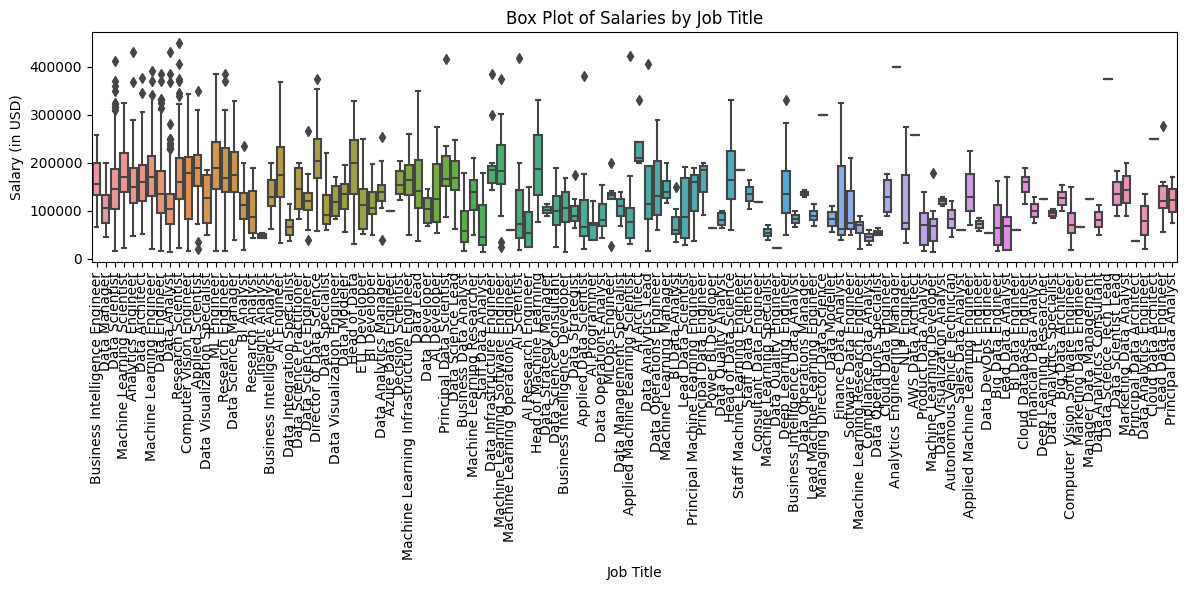

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot of salaries for different job titles
plt.figure(figsize=(12, 6))
sns.boxplot(data=salaries_df, x='job_title', y='salary_in_usd')
plt.xticks(rotation=90)
plt.title('Box Plot of Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (in USD)')
plt.tight_layout()
plt.show()


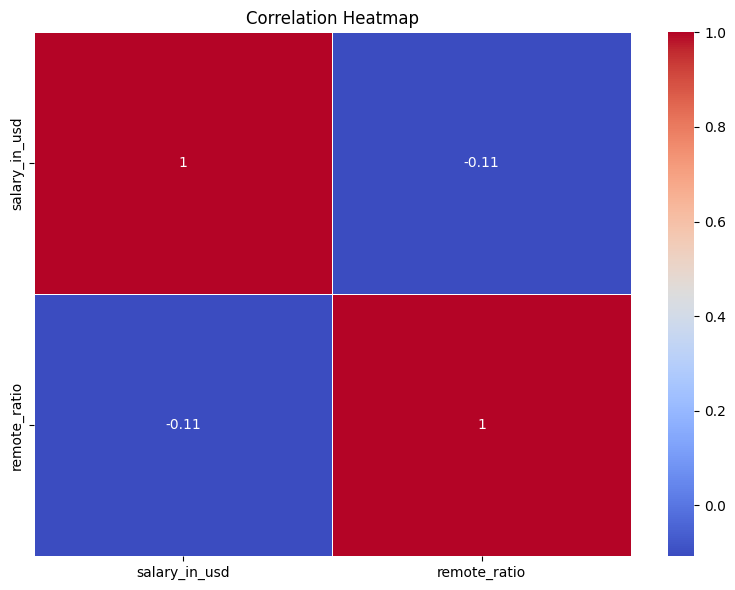

In [60]:
# Calculate the correlation matrix
correlation_matrix = salaries_df[['salary_in_usd', 'remote_ratio']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
